# Simple Linear Regression

The simple linear regression is a model that is basically the good ol' equation of a line:

$
y=b_{0}+b_{1}x_{1}.
$

Essentially, we are after seeing how the dependent variable, $y$ depends on some independent variable, $x_{1}$. This dependency may rely on some connection described by the proportionality coefficient (the slope), $b_{1}$, while some constant, $b_{0}$ describes the the dependent variable's value when the independent variable's value is zero.

The line that this equation describes, in this context, is the trend line that best fits a data set. So the obvious question is *how does the simple linear regression find that line*? This is what we will go over. This machine learning method takes a data set that contains a set of response values, $y_{n}$, and a set of feature values, $x_{n}$, and for each observation of $y_{n}$, it developes a corresponding modeled value, $\hat{y_{n}}$, for each observed $x_{n}$ value. The method then gets to the best fitting line by taking the difference between each $y_{n}$ and the $\hat{y_{n}}$ value and sums them and then square that result. It will then repeat this process many, many times, recording these sums of squares, and then it will seek to minimize this result, thus finding the minimum sum of squares, and this minimum is the *best fitting line*, described by:

$
\min{\left(\sum(y_{n}-\hat{y_{n}})^{2}\right)}.
$

Now, let's do this.

## Preprocessing Data

Data Preprocessing is required for all machine learning projects as it ensures the data is ready for ingestion into the model and the model will not be garbage. Yes, some boring things must be done first. Respect the process.

We will use a with salary data set for this project, where we want to wish to create a best fit line such that we can predict a person's salary based on how many year's of experience they have. So let's bring the data in and get it ready!

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data in as a dataframe
df = pd.read_csv('data/Salary_Data.csv')

In [3]:
# look at the data
print(df.shape, '\n', df.head())

(30, 2) 
    YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [4]:
# split the data into feature and response matrices
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [5]:
# inspecting the feature and response matrices
print('Feature\n', X, '\n', 'Response\n', y)

Feature
 [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] 
 Response
 [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [6]:
# splitting into trainign and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state = 0)

In [7]:
# inspect the training set
print('X\n', X_train, '\n', 'y\n', y_train)

X
 [[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]] 
 y
 [ 56642.  66029.  64445.  61111. 113812.  91738.  46205. 121872.  60150.
  39891.  81363.  93940.  57189.  54445. 105582.  43525.  39343.  98273.
  67938.  56957.]


In [8]:
# inspect the test set
print('X\n', X_test, '\n', 'y\n', y_test)

X
 [[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]] 
 y
 [ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


We will use the training set to train our simple linear regression model, and then test its performance on the test set. We are now ready to begin building our model!

## Training the Model

The simple linear regression model we wish to build could, of course, be implemented from scratch, but this may not be the most efficient thing to do in practice. Fortunately, the Scikit Learn package has you covered. After importing the linear regression library we can then train our model.

In [9]:
# importing linear regression from sklearn
from sklearn.linear_model import LinearRegression

# create object of the LinearRegression class
regressor = LinearRegression()

# fit the regressor to the training set
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Our model has now learned from the training set and come up with what it thinks is the best fit line describing the data. It is now ready to predict the outcomes of the test set.

## Testing the Model

With our model constructed, we will now see if it can accurately predict salaries from new observations in our test set. to do this we will need to create a vector of predicted responses, *y_pred*. This vector will contain the model's *predicted* values for Salary, given the Age values in the test set. We will then compare *y_pred* to the actual Salary values in the test set.

In [10]:
# predicting the test set
y_pred = regressor.predict(X_test)

Now that we have fed the test set's observations for Experience, our model has predicted what the corresponding salaries are. We can look at the product before we actually analyze the models performance by comparing them to the actual values.

In [11]:
# inspect the predicted values vector
print(pd.DataFrame(y_pred))

               0
0   40835.105909
1  123079.399408
2   65134.556261
3   63265.367772
4  115602.645454
5  108125.891499
6  116537.239698
7   64199.962017
8   76349.687193
9  100649.137545


## Evaluating Model Performance

Instead of performing a quantitative assessment of the model's performance, we will perform a qualitative evaluation by employing the ITE (Intra-occular Trauma Examination), also known as plotting the training data set with our model's regression line to *see* the best fit line.

Text(0,0.5,'Salary [$]')

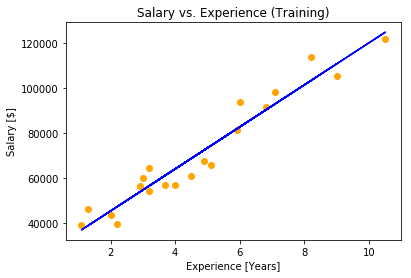

In [12]:
# visulaizing the training set
plt.scatter(X_train, y_train, c='orange')
plt.plot(X_train, regressor.predict(X_train), c='blue')
plt.title('Salary vs. Experience (Training)')
plt.xlabel('Experience [Years]')
plt.ylabel('Salary [$]')

We see that the real values are the orange dots, while the modeled values lie on the blue line. We can see that there is, indeed, a linear dependency we can see in the real observations, so the linear regresssion was a good choice. Now, let's see how our model handled new observations in the test set.

Text(0,0.5,'Salary [$]')

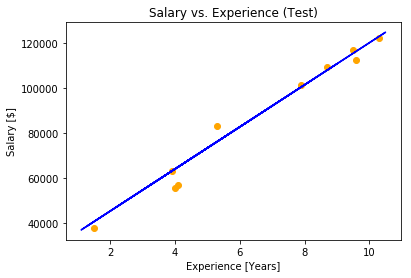

In [13]:
# visualize the test set
plt.scatter(X_test, y_test, c='orange')
plt.plot(X_train, regressor.predict(X_train), c='blue')
plt.title('Salary vs. Experience (Test)')
plt.xlabel('Experience [Years]')
plt.ylabel('Salary [$]')

Well, it *looks* good. There are, of course, some values that do not fall on the fitted line, due to there not actually being a 100% correlation between the years of Experience and the Salary.

As this example demonstrates,the simple linear regression is a quick and easy machine learning method.